In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_C_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.6991,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.9236,0.772910,0.641450
2,-0.169460,NaN,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.5318,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.6593,0.618250,3.265800
4,NaN,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.0632,1.026900,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.3255,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.6675,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.3433,1.622500,1.585300
798,3.441400,NaN,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,NaN,1.884500,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	88
float64		column 2	81
float64		column 3	79
float64		column 4	74
float64		column 5	65
float64		column 6	77
float64		column 7	89
float64		column 8	69
float64		column 9	85
float64		column 10	78
float64		column 11	81
float64		column 12	94


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,712.000000,719.000000,721.000000,726.000000,735.000000,723.000000,711.000000,731.000000,715.000000,722.000000,719.000000,706.000000
mean,1.545192,1.381739,1.963468,1.921941,1.972846,1.992869,1.954778,2.003050,2.018586,2.003609,1.970964,1.955117
std,2.765103,3.612805,1.153235,1.153200,1.166208,1.141598,1.160895,1.147303,1.152658,1.162372,1.178550,1.123606
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.002088
25%,-0.388600,-0.573115,1.007500,0.929173,0.952450,0.992820,0.958605,0.981935,1.068550,1.030050,0.921540,0.967128
50%,1.577750,2.399400,1.961800,1.862200,2.015000,1.976900,1.969800,2.007400,2.032400,2.047250,1.940000,1.940650
75%,4.022575,4.538400,2.919600,2.921525,2.946250,2.981600,2.960350,2.973250,3.019750,3.008225,3.068750,2.863575
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

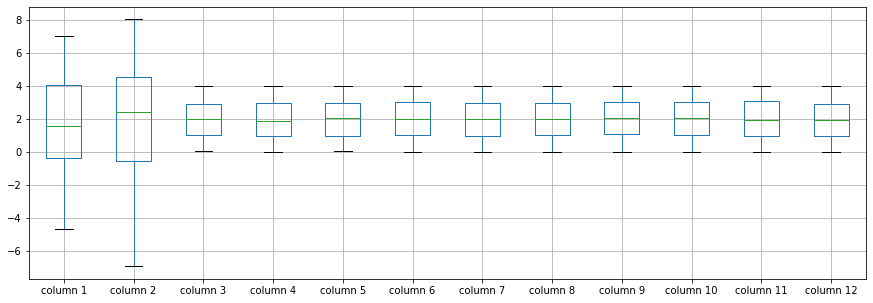

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.545192
column 2     1.381739
column 3     1.963468
column 4     1.921941
column 5     1.972846
column 6     1.992869
column 7     1.954778
column 8     2.003050
column 9     2.018586
column 10    2.003609
column 11    1.970964
column 12    1.955117
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.426803,-0.023411,-0.007562,0.008069,0.022205,-0.024491,0.032590,0.014169,0.013226,0.032767,0.022283
column 2,-0.426803,1.000000,-0.013059,-0.056399,-0.028383,0.000312,0.054051,-0.016408,-0.043339,-0.032707,-0.090896,0.014763
column 3,-0.023411,-0.013059,1.000000,-0.049488,0.075453,0.012251,0.042950,0.005161,-0.025029,-0.015266,-0.053892,-0.016329
column 4,-0.007562,-0.056399,-0.049488,1.000000,-0.012305,-0.067918,0.003457,0.016062,-0.018515,0.020140,0.055231,-0.029773
column 5,0.008069,-0.028383,0.075453,-0.012305,1.000000,0.064936,0.021352,0.012667,-0.038991,-0.019712,0.003425,0.016930
column 6,0.022205,0.000312,0.012251,-0.067918,0.064936,1.000000,-0.062498,0.056028,0.013645,-0.005097,-0.056320,0.004336
column 7,-0.024491,0.054051,0.042950,0.003457,0.021352,-0.062498,1.000000,-0.045838,-0.008914,-0.034568,-0.016006,-0.008479
column 8,0.032590,-0.016408,0.005161,0.016062,0.012667,0.056028,-0.045838,1.000000,-0.092763,-0.024043,-0.019143,-0.051320
column 9,0.014169,-0.043339,-0.025029,-0.018515,-0.038991,0.013645,-0.008914,-0.092763,1.000000,0.065698,0.019834,-0.039170
column 10,0.013226,-0.032707,-0.015266,0.020140,-0.019712,-0.005097,-0.034568,-0.024043,0.065698,1.000000,-0.038095,0.048371


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+66,12+66+66,12+66+66+66,12+66+66+66+66,12+66+66+66,12+66+66,12+66,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.62751350402832
Epoch: 1 , loss: 26.342823791503907
Epoch: 2 , loss: 24.85626811981201
Epoch: 3 , loss: 21.908977737426756
Epoch: 4 , loss: 21.00608711242676
Epoch: 5 , loss: 20.55507888793945
Epoch: 6 , loss: 20.20886219024658
Epoch: 7 , loss: 19.817007179260255
Epoch: 8 , loss: 19.533472366333008
Epoch: 9 , loss: 19.152871322631835
Epoch: 10 , loss: 18.994235496520997
Epoch: 11 , loss: 18.91411060333252
Epoch: 12 , loss: 18.823116569519044
Epoch: 13 , loss: 18.75211555480957
Epoch: 14 , loss: 18.345803394317628
Epoch: 15 , loss: 18.16372913360596
Epoch: 16 , loss: 18.320550842285158
Epoch: 17 , loss: 18.263935012817385
Epoch: 18 , loss: 18.117094821929932
Epoch: 19 , loss: 18.05178424835205
Epoch: 20 , loss: 17.89620792388916
Epoch: 21 , loss: 17.977145919799806
Epoch: 22 , loss: 17.92676216125488
Epoch: 23 , loss: 18.075402336120604
Epoch: 24 , loss: 17.97586217880249
Epoch: 25 , loss: 17.83831504

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    1.475001
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,0.000000,0.912689,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,0.947401,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,-0.722063
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
796,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
797,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
798,0.000000,5.547169,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,-0.304771,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(57.58402150611194, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.23198596253693043

In [18]:
new_df.iloc[66,:]

column 1     0.20762
column 2     1.70738
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.161340,0.067351,3.53370,0.469590,0.67908,3.43440,2.792400,2.77630,1.699100,3.815600,1.746400
1,-0.098505,-0.178570,2.062800,2.92160,0.424720,1.17850,1.68020,1.388800,3.21670,2.923600,0.772910,0.641450
2,-0.169460,1.414219,2.470900,3.06500,1.567600,1.48240,0.92160,2.642400,1.51870,2.531800,2.432800,1.876800
3,-0.136050,0.472790,0.588090,1.95630,2.787000,2.59570,2.89330,1.537500,0.99942,3.659300,0.618250,3.265800
4,1.046231,0.234180,0.429700,1.63120,3.554100,2.27110,0.37425,2.178600,1.31400,1.063200,1.026900,1.466337
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.686700,1.576000,0.55612,0.070769,2.07470,0.80304,3.222900,3.49330,1.325500,3.231100,0.005387
796,3.466600,-4.034600,3.100400,1.34610,1.377300,2.28870,0.39613,2.396100,2.46350,1.667500,2.461700,1.226700
797,3.344800,-2.384300,2.031000,2.26460,3.341200,1.53700,1.22560,0.740270,2.49540,1.343300,1.622500,1.585300
798,3.441400,0.330869,1.577000,1.84400,1.098700,3.42430,0.81081,3.727000,1.18790,0.646349,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_C_10(imp).xlsx", index=False, header=False)